In [2]:
#Quantum Circuit written by Sakibul Islam Sazzad
#Graduate Research Fellow
#Bangladeh Reference Institute for Chemical Measurements
#https://sites.google.com/view/sakibulislamsazzad/


import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
#from ibm_quantum_widgets import *

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Around 40 years ago Richard Feynman quoted "Nature isn't classical, damn it...." Since then researchers were exploring trying to harness the quantum power of nature using quantum simulations. Thats why we need a quantum computer, like existing computer laptop, mobile etc. Only difference is that we need quantum gates to create a quantum computers. These quantum gates will operate on ***qubits***, unit of quantum computing. 

Quantum gates are basically unitary operators, the conditions of being unitary operator is $UU^{\dagger}= U^{\dagger}U=I$, here $U$ is a unitary matrix and $U^{\dagger}$ is its transpose conjugate, $I$ is the identity matrix. 

**Example:** Lets for an example at this moment we deal with $Pauli Y$ gate, it is famously known as $\sigma_{y}$ gate. Its matrix representation is like this,
$
\left[
\begin{matrix}
0 & -i \\
i & 0
\end{matrix}
\right]
$
As before mentioned, to check its unitary property we can **transpose** the matrix and convert the **conjugate** of complex number.. Transpose is done by swap rows into columns and vice versa. Hence $\sigma_{y}^{T} = \left[\begin{matrix} 
0 & i\\
-i & 0
\end{matrix}
\right]$ 

Now conjugate of the $\sigma_{y}^{T}$ will convert it into $\sigma_{y}^{\dagger}= \left[\begin{matrix}
0 & -i\\
i & 0
\end{matrix}
\right]$. Now multiply $\sigma_{y}\sigma_{y}^{\dagger}$, you will find the its equivalent to $I = \left[\begin{matrix}
1 & 0\\
0 & 1
\end{matrix}
\right]$

Another special property of Qunatum gates are **Reversible**, that means $initialstates\rightarrow quantumgates \rightarrow outputstates \rightarrow quantumgates \rightarrow initialstates$. We will first prove this **reversible** property by **Hadamard** gate, basically it is known a H-gate also. Using H gates we can show the superposition property of a qubit.

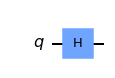

In [3]:
#At first we will make define a 1 qubit quantum circuit
# we can follow this code to implement it
qc = QuantumCircuit(1)
#we already defined a qubit in 'qc' variable
#now we can employ an H gate in here
qc.h(0) 
#note that q.h(0) is written, here 0 means first qubit
#if you deal with more than 1 qubit we will start with 0, 1 like this
#now we will draw the circuit
#we will find that in qubit 0 H-gate is employed
qc.draw()

Now we will check the unitary matrix of H-gate by applying **unitary simulation**. This can be done by employing **unitary_simulator**. Remember whenever you will run a simulator, there are 3 steps to be followed.
1. First get the simulator (Qasm, Unitary, Statevector, Pulse whatever it is)
2. Then execute the simulator by **execute** command
3. Get the result

Now we will check the *reversible* property of a quantum gate using both unitary matrix and qasm simulator. At first we will check the unitary matrix of H gate. We will find its matrix
$
\left[
\begin{matrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
\end{matrix}
\right]
$

after end of unitary simulation

In [4]:
#wa want to see the matrices of H-gate 
#to do this we need unitary simulation
#this is done by get unitary property

backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

# Show the results
print(result.get_unitary(qc, decimals=3))

Operator([[ 0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j]],
         input_dims=(2,), output_dims=(2,))


In [5]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

As before said *reversible* circuit means, applying a quantum logic gate twice into a state will give us the initital state. We started with 0 state now, if I apply H-gate twice we will see that, after end of twice H-gate we are getting 0. We will check that using *qasm_simulator*. To implement *qasm_simulator* we need a measurement, so we will add a **measure** after applying 2 H-gate.
In qiskit *shots* means how many times we will measure, here we did the measure 1024 times. And we will find the histogram plot for 0 state 1, that means we will always get 1 after applying 2 H-gates.

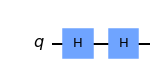

In [6]:
qc.h(0)
qc.draw()

/tmp/ipykernel_60/2155766716.py:3: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = qc+meas


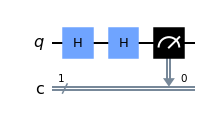

In [7]:
meas  = QuantumCircuit(1,1)
meas.measure(0,0)
qc = qc+meas
qc.draw()

In [8]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim, shots=1024)
result_sim = job_sim.result()

counts = result_sim.get_counts(qc)
print(counts)

{'0': 1024}


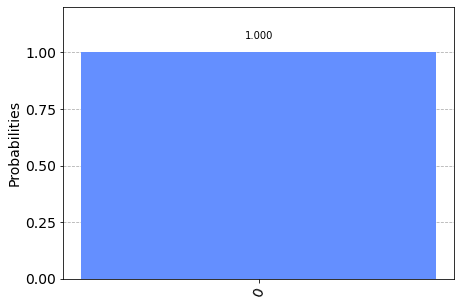

In [9]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Now lets be familiar with some other single qubits quantum gates, and we will check their state changeing properties by bloch-sphere. In this tutorial we will check the mostly used quantum gates like **Pauli X, Pauli Z gate, Pauli X gate**.

**Pauli X gate:**

# A Reversibility Game
To play this you have to write a circuit, in quantum any circuit resulted in a martix. We are going to check if the initial of the circuit and re-arranging the circuit provide us the same results? 

In [10]:
def reversibility(circ1):
    #here circ1 is the main circuit that you want to put in
    #it could be something like this
    # circ1= QuantumCircuit(num_qubits)
    #make your own circuit
    backend1 = Aer.get_backend('unitary_simulator')
    job1 = execute(circ1, backend)
    result1 = job1.result()

    # Show the results
    print(result.get_unitary(qc, decimals=3))
    
    #now inverse the circuit
    circ2 = circ1.inverse()
    
    #now get the results
    backend2 = Aer.get_backend('unitary_simulator')
    job2 = execute(circ2, backend)
    result2 = job2.result()
    
    if result1==result2:
        
        decision1 = print("circuit is reversible")
    else:
        decision2 = print("circuit isn't reversible")
    
    return decision1, decision2

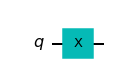

In [11]:
circ_x =  QuantumCircuit(1)
circ_x.x(0)
circ_x.draw()

It is important to note that, qubit states are initialised to 0 always. We can change the initial state, we will do that later. Now lets focus on role of Pauli X gate. Basically it is analogous to **classical not gate**, a NOT gate flips the bit state. Same thing is done by the **Pauli X/ $\sigma_{x}$ gate**, it flips the qubit state $|0\rangle$ to $|1\rangle$. lets check that using qasm simulator. Remember whenever you want to run qasm simulator always add a measure to the circuit, otherwise it wont count. Can you guess why it cant count without measurement?

/tmp/ipykernel_60/1525685599.py:3: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = circ_x+meas


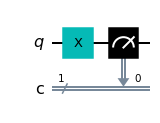

In [12]:
meas  = QuantumCircuit(1,1)
meas.measure(0,0)
circ = circ_x+meas
circ.draw()

{'1': 1024}


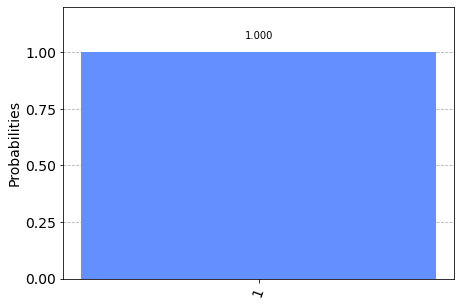

In [13]:
qa_sim = Aer.get_backend('qasm_simulator')
job_qa = execute(circ, qa_sim, shots =1024)
result_qa = job_qa.result()

count_qa = result_qa.get_counts(circ)
print(count_qa)

from qiskit.visualization import plot_histogram
plot_histogram(count_qa)

Now we will check the rotation of **Pauli X** gate from state $|0\rangle$ to $|1\rangle$ in bloch shpere. At first we will check how does $|0\rangle$ state looks in bloch sphere

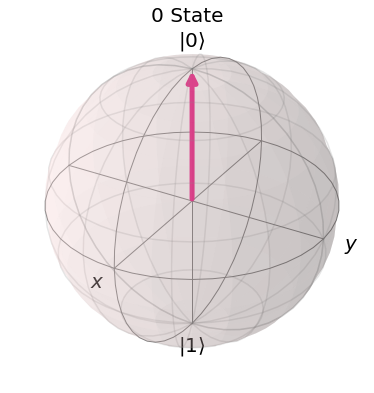

In [14]:
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

plot_bloch_vector([0,0,1], title= "0 State")

So after applying X gate to this $|0\rangle$ state, it will flip to $|1\rangle$ state, basically Pauli X gate is $\pi$ rotation around X axis. So lets check how does it will look in bloch shpere of $|1\rangle$ state. Remember we are just doing bruce-force to show you $|0\rangle$ state and $|1\rangle$ state. We havent yet applied bloch sphere to our quantum circuit. We will do that just after it

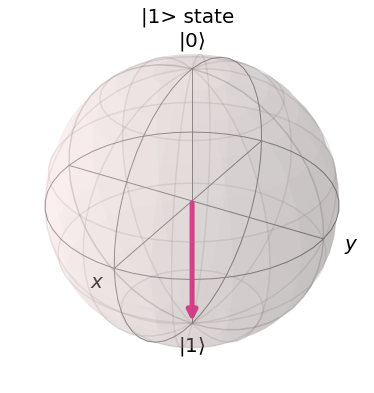

In [15]:
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

plot_bloch_vector([0,0,-1], title = "|1> state")

Now we will apply Bloch Sphere in our quantum circuit, to do this we have to import *plot_state_qsphere*

In [16]:
from qiskit.visualization import plot_state_qsphere

back_x =  Aer.get_backend('statevector_simulator')
result_x = execute(circ_x, back_x).result()
state_x = result_x.get_statevector(circ_x)

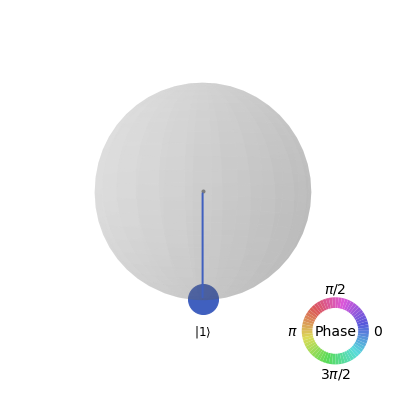

In [17]:
plot_state_qsphere(state_x)

Have you noticed that we used used *statevector_simulator* to check the Bloch Sphere. And you are carefully check the color code of phase you will find that it is in phase 0. Reason behind is simple, **Pauli X** gate only change the bit state, that's why it stays in 0. But **Pauli Z** gate do the phase changes. Cool, now we have learnt all the necessary *Aer.backend()* simulalor. So lets check about **Pauli Z** gate and we will learn that it changes phase.

**Pauli Z gate**

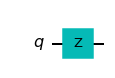

In [18]:
circ_z = QuantumCircuit(1)
circ_z.z(0)
circ_z.draw()

Matrix of Pauli Z is $\left[
\begin{matrix}
1 & 0\\
0 & -1
\end{matrix}
\right]$. Do you know how to read qubit states from matrix? Lets learn it, check about first column $\left[
\begin{matrix}
1\\
0
\end{matrix}
\right]$, see this is $|0\rangle$ state. This means **Pauli Z** gate has no effect on $|0|rangle$ state. Now if you look at second column, it is $\left[\begin{matrix}
0\\
-1
\end{matrix}
\right]$, see **Pauli Z** gate has changed the $|1\rangle$ state to $-|1\rangle$ state. That means **Pauli Z** gate changes phase of $|1\rangle$ state only. Lets check that in bloch sphere. But before that we have to *initialize* qubit state to $|1\rangle$

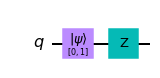

In [19]:
circ_1 = QuantumCircuit(1)
initial_state = [0,1]
circ_1.initialize(initial_state, 0)
circ_1.z(0)
circ_1.draw()

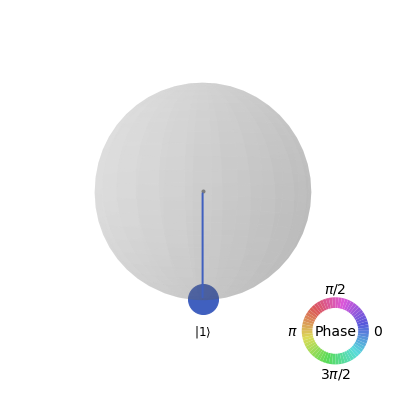

In [20]:
backend =  Aer.get_backend('statevector_simulator')
result = execute(circ_1, backend).result()
z_phase = result.get_statevector(circ_1)

plot_state_qsphere(z_phase)